#### URL 이미지 불러오기

sunflower 0.674
sunflower 0.521
sunflower 0.62
Sun hat 0.714
sunflower 0.501
sunflower 0.714
person 0.538


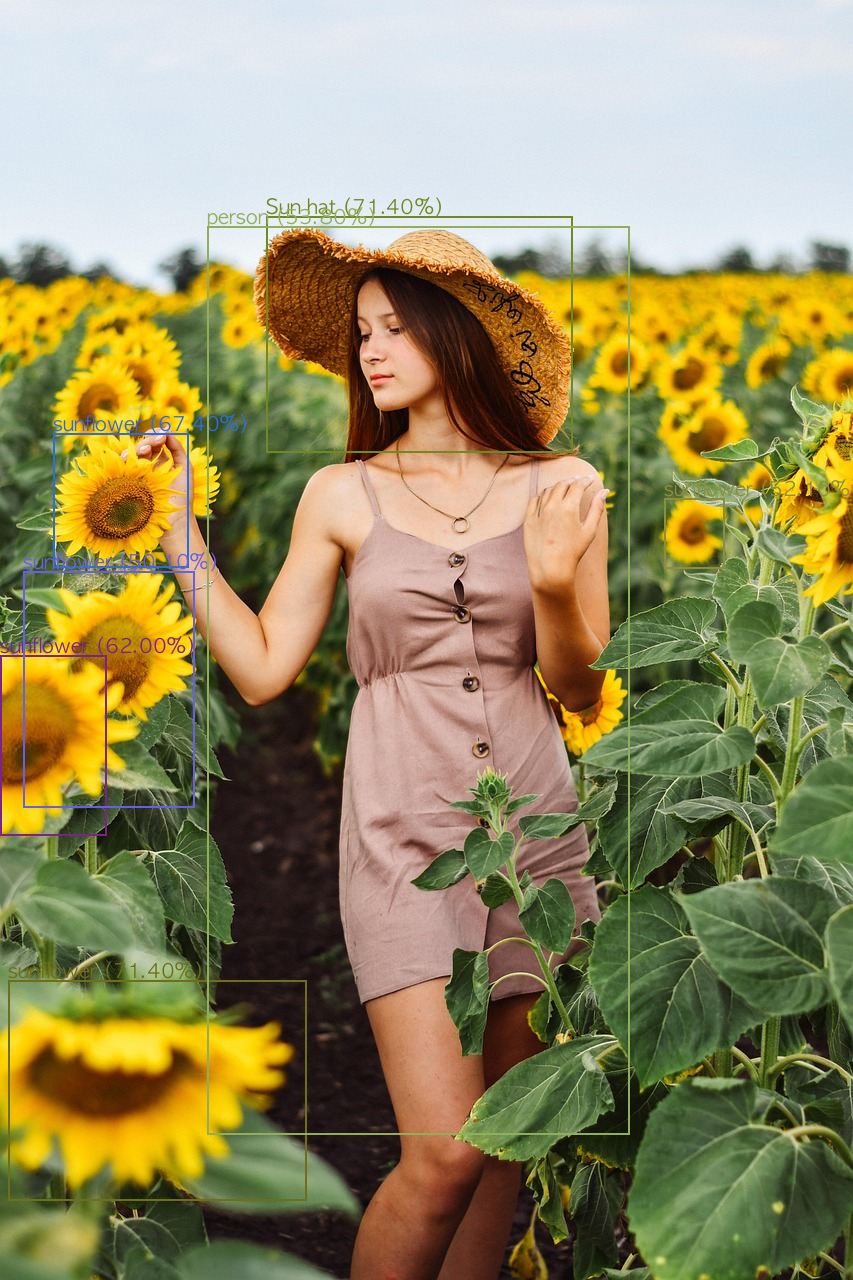

In [ ]:
import requests
from PIL import Image, ImageDraw
from io import BytesIO


IMAGE_URL = "https://cdn.pixabay.com/photo/2023/12/13/22/29/young-woman-8447841_1280.jpg"


def random_color():
    import random
    # 랜덤한 RGB 색상 튜플 반환
    import random
    return (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) 


def get_font():
    # OS별로 적절한 폰트 객체 반환 (한글 지원)
    from PIL import ImageFont
    import platform
    
    font_size = 20
    
    try:
        if platform.system() == "Windows":
            return ImageFont.truetype("malgun.ttf", font_size)
        elif platform.system() == "Darwin":  # macOS
            return ImageFont.truetype("AppleGothic.ttf", font_size)
        else:  # Linux      
            return ImageFont.load_default(size=font_size)
    except IOError:
        # 폰트 파일이 없을 경우 기본 폰트 사용
        return ImageFont.load_default(size=font_size)
    

def request_objects(url):
    endpoint = "https://fimtrus-vision2.cognitiveservices.azure.com/computervision/imageanalysis:analyze?api-version=2024-02-01&features=objects"
    
    headers = {
        "Ocp-Apim-Subscription-Key": "1Xvo96LQT7LFAe6FgQUeO3f8UwOfELLcvZNJThBQW6LJsBdUhwzrJQQJ99BGACYeBjFXJ3w3AAAFACOGxEEM"
    }

    body = {
        "url": url
    }

    response = requests.post(endpoint, headers=headers, json=body)

    if response.status_code != 200:
        print("Error:", response.status_code, response.text)
        return None
        
    response_json = response.json()
    
    return response_json


def draw_image(url, data):
    image_response = requests.get(url)

    image = Image.open(BytesIO(image_response.content))
    draw = ImageDraw.Draw(image)

    block_list = data['objectsResult']['values']

    for block in block_list:
        color = random_color()
        font = get_font()
        bounding_box = block['boundingBox']
        tag = block['tags'][0]
        
        x, y, w, h = bounding_box['x'], bounding_box['y'], bounding_box['w'], bounding_box['h']
        name = tag['name']
        confidence = tag['confidence']
        
        formatted_text = "{} ({:.2f}%)".format(name, confidence * 100)
        
        # 좌측 상단, 우측 하단
        draw.rectangle([(x, y), (x + w, y + h)], outline=color, width=2)
        draw.text((x, y - 20), formatted_text, fill=color, font=font)
        print(name, confidence)
    
    return image

response_json2 = request_objects(IMAGE_URL)
draw_image(IMAGE_URL, response_json2)
